## HW4_zz1598
# Assignment 4:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole exrcise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [226]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
#from getCitiBikeCSV import getCitiBikeCSV  

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [227]:
def getCitiBikeCSV(datestring):
    print("Try downloading...", datestring)

    #check if it is in the folder already
    if not os.path.isfile(os.getenv('PUIDATA') + "/" + datestring + '-citibike-tripdata.csv'):
        if not os.path.isfile(os.getenv('PUIDATA') + '/' + datestring + '-citibike-tripdata.zip'):
            #if not exists, then download the zip file from website
            os.system('curl -O https://s3.amazonaws.com/tripdata/'+ datestring + "-citibike-tripdata.zip")
        # Move the file into PUIDATA directory
        os.system('mv ' + datestring + '-citibike-tripdata.zip ' + os.getenv('PUIDATA'))
        #unzip the file, and move from current dir to PUIDATA
        os.system('unzip ' + os.getenv('PUIDATA') + '/' + datestring + '-citibike-tripdata.zip')
        os.system('mv ' + datestring + '-citibike-tripdata.csv ' + os.getenv('PUIDATA'))
    
    if 201307 <= int(datestring) < 201409:
        os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    elif int(datestring) < 201307:
        print ('No data earlier than 201307')
        
    print ("file in place, you can continue")

In [228]:
datestring = raw_input("Enter datestring(i.e.201308): ")
getCitiBikeCSV(datestring)
# We use 201512 data

Enter datestring(i.e.201308): 201502
('Try downloading...', '201502')
file in place, you can continue


In [229]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [230]:
df['date'] = pd.to_datetime(df['starttime']) 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [231]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [232]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [233]:
#create df2 with selected attributes  (possibly worke????)
#df2 = pd.DataFrame(df.gender,df.ageM,df.ageF)
#df2.head()

In [234]:
#create df2 with selected attributes
df2 = df.loc[:,('starttime','date','birth year','gender','ageM', 'ageF')]
df2.head()

,starttime,date,birth year,gender,ageM,ageF
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0
1,2/1/2015 0:00,2015-02-01 00:00:00,1993.0,1,22.0,NaN
2,2/1/2015 0:01,2015-02-01 00:01:00,1969.0,2,NaN,46.0
3,2/1/2015 0:01,2015-02-01 00:01:00,1985.0,2,NaN,30.0
4,2/1/2015 0:01,2015-02-01 00:01:00,1957.0,1,58.0,NaN


In [235]:
df2.describe()

,birth year,gender,ageM,ageF
count,194663.000000,196930.000000,161561.000000,33064.000000
mean,1975.288031,1.156203,39.915171,38.738326
std,11.734009,0.393946,11.755518,11.571452
min,1899.000000,0.000000,16.000000,17.000000
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN
max,1999.000000,2.000000,116.000000,115.000000


In [236]:
# dropping NaN values
df2['ageM'].dropna(inplace= True)
df2['ageF'].dropna(inplace= True)
df2.head()

,starttime,date,birth year,gender,ageM,ageF
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0
1,2/1/2015 0:00,2015-02-01 00:00:00,1993.0,1,22.0,NaN
2,2/1/2015 0:01,2015-02-01 00:01:00,1969.0,2,NaN,46.0
3,2/1/2015 0:01,2015-02-01 00:01:00,1985.0,2,NaN,30.0
4,2/1/2015 0:01,2015-02-01 00:01:00,1957.0,1,58.0,NaN


# Figure 1: histogrammed distribution of riders' ages by gender

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

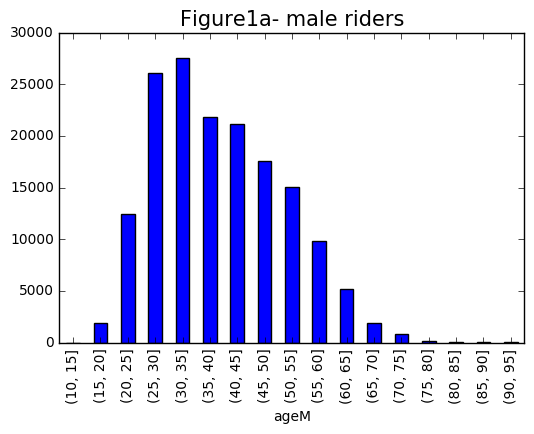

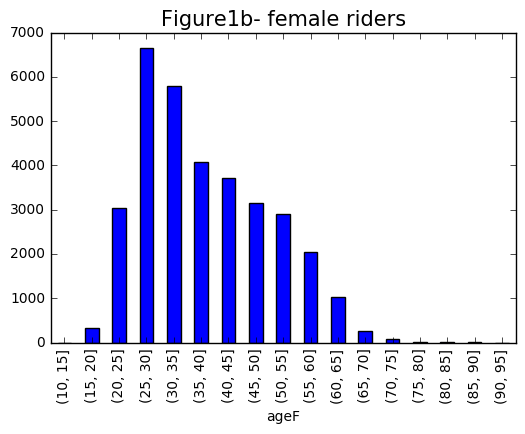

In [237]:
# plotting histograms with pandas
bins = np.arange(10, 99, 5)
axM = df2.ageM.groupby(pd.cut(df2.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("Figure1a- male riders", fontsize=15)

axF = df2.ageF.groupby(pd.cut(df2.ageF, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axF.set_title("Figure1b- female riders", fontsize=15)


# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

In [238]:
print df2.ageM, df2.ageM.cumsum() 


1         22.0
4         58.0
5         36.0
6         32.0
7         60.0
9         33.0
14        38.0
15        47.0
16        25.0
17        28.0
18        35.0
19        55.0
20        29.0
21        28.0
22        46.0
23        58.0
24        34.0
25        22.0
26        40.0
27        42.0
29        38.0
30        34.0
31        24.0
32        35.0
33        44.0
34        31.0
35        20.0
37        47.0
38        22.0
39        49.0
          ... 
196892    27.0
196893    61.0
196896    34.0
196897    33.0
196898    49.0
196899    23.0
196900    30.0
196901    24.0
196903    27.0
196904    27.0
196905    32.0
196906    51.0
196907    20.0
196908    34.0
196909    50.0
196912    33.0
196913    58.0
196914    60.0
196915    32.0
196916    39.0
196917    38.0
196918    32.0
196919    40.0
196920    43.0
196921    35.0
196923    55.0
196924    25.0
196925    25.0
196926    44.0
196927    30.0
Name: ageM, dtype: float64 1              22.0
4              80.0
5             116.

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.002159
(20, 25]       0.013054
(25, 30]       0.052331
(30, 35]       0.056668
(35, 40]       0.044718
(40, 45]       0.026353
(45, 50]       0.012632
(50, 55]       0.007243
(55, 60]       0.008507
(60, 65]       0.007611
(65, 70]       0.003617
(70, 75]       0.000761
(75, 80]       0.000282
(80, 85]       0.000032
(85, 90]       0.000074
(90, 95]       0.000000


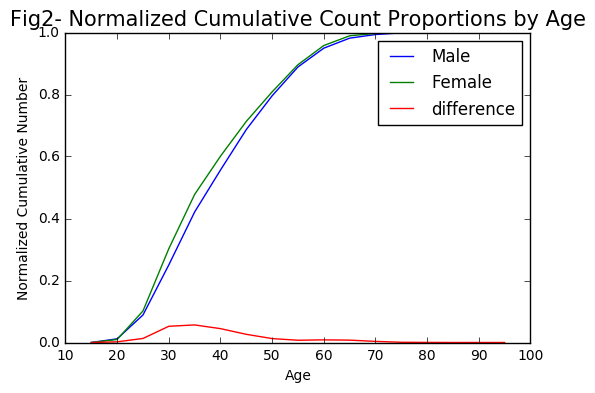

In [239]:
csM=df2.ageM.groupby(pd.cut(df2.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df2.ageF.groupby(pd.cut(df2.ageF, bins)).agg([count_nonzero]).cumsum()
 
print (np.abs(csM/csM.max() - csF/csF.max()))  #|proportions of cumsum M - proportions of cumsom F|

pl.plot(bins[:-1] + 5, csM/csM.max(), label = 'Male')
pl.plot(bins[:-1] + 5, csF/csF.max(), label = 'Female')
pl.plot(bins[:-1] + 5, np.sqrt((csF/csF.max() - csM/csM.max())**2), 'r-',
        label = "difference")
pl.title('Fig2- Normalized Cumulative Count Proportions by Age',fontsize=15)
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there amay be Nan values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


### $\alpha$ = 0.05
## H0: There is no significant difference between the age distributions of Female and Male riders sample. 

In [240]:
ks = scipy.stats.ks_2samp(df2.ageM[~np.isnan(df2.ageM)], df2.ageF[~np.isnan(df2.ageF)])
print (ks)

Ks_2sampResult(statistic=0.08478881431969218, pvalue=4.5875015783108826e-172)


The scipy.stats KS test already tells me the significance and the p-value. I recalculate it for a reality check.

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/



In [241]:
# notice that the factor is very large!! its gonna be hard to get a stat larger than that!
sqr_nratio = np.sqrt((len(df2['ageF']) + len(df2['ageM'])) / (len(df2['ageF']) * len(df2['ageM'])))
print '{}'.format(sqr_nratio)
# this ratio too small that approaches to zero

0.0


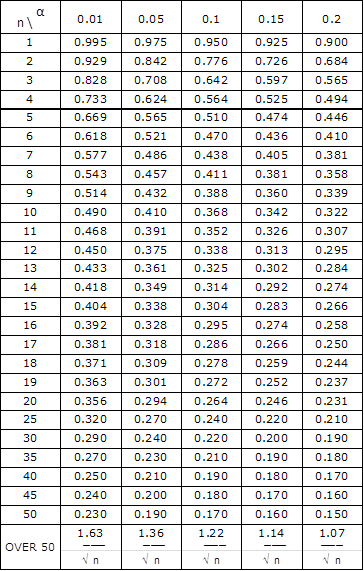

In [242]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
# Image Reference: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
from IPython.display import Image
Image(filename="ks2sample_table.png")

## Calculating critical value using the c($\alpha$) value

In [243]:
### **c(a) = 1.36** as n>50, alpha=0.05 which means that 
c_a = 1.36
criti_value = c_a * sqr_nratio
print criti_value

0.0


### the sample KS statistics = 0.0848 > critical value that is ≈ 0  
(the sample p-value = 4.5875015783108826e-172 ≈ 0 **<** 0.05 = $\alpha$)
### So we reject the null hypothesis, concluding that there is a significant difference between the female and the male age group (they are not from the same distribution)

# Redo the test with a subsample of the data: take only 1 ride every of 200 

In [244]:
# Number of rows(index length)
df2.shape[0]

196930

In [245]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

#create sub samples that are every 200 observations
row_ind200 = np.arange(0,df2.shape[0], 200 )
df2_sub = df2.iloc[row_ind200, :]
df2_sub.head(10)

,starttime,date,birth year,gender,ageM,ageF
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0
200,2/1/2015 3:57,2015-02-01 03:57:00,1982.0,1,33.0,NaN
400,2/1/2015 8:42,2015-02-01 08:42:00,1981.0,2,NaN,34.0
600,2/1/2015 9:40,2015-02-01 09:40:00,1985.0,2,NaN,30.0
800,2/1/2015 10:19,2015-02-01 10:19:00,1973.0,1,42.0,NaN
1000,2/1/2015 10:45,2015-02-01 10:45:00,1965.0,2,NaN,50.0
1200,2/1/2015 11:10,2015-02-01 11:10:00,1990.0,2,NaN,25.0
1400,2/1/2015 11:35,2015-02-01 11:35:00,1980.0,2,NaN,35.0
1600,2/1/2015 11:55,2015-02-01 11:55:00,1994.0,2,NaN,21.0
1800,2/1/2015 12:19,2015-02-01 12:19:00,1980.0,1,35.0,NaN


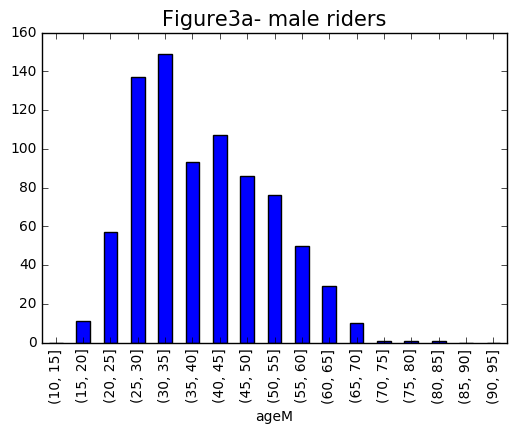

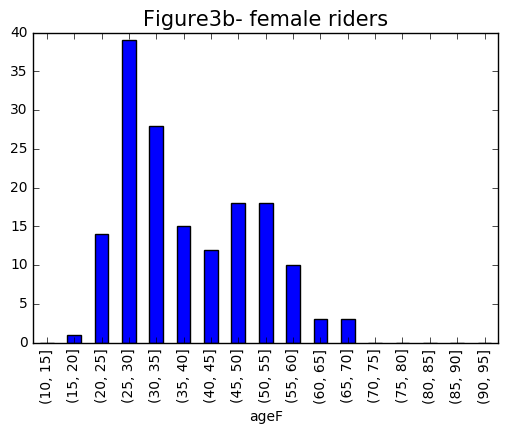

In [246]:
# plotting histograms for sub samples
bins = np.arange(10, 99, 5)

axM = df2_sub.ageM.groupby(pd.cut(df2_sub.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("Figure3a- male riders", fontsize=15)

axF = df2_sub.ageF.groupby(pd.cut(df2_sub.ageF, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axF.set_title("Figure3b- female riders", fontsize=15)


          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.007403
(20, 25]       0.009009
(25, 30]       0.081691
(30, 35]       0.071198
(35, 40]       0.049267
(40, 45]       0.008625
(45, 50]       0.003259
(50, 55]       0.014483
(55, 60]       0.014713
(60, 65]       0.002544
(65, 70]       0.003713
(70, 75]       0.002475
(75, 80]       0.001238
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


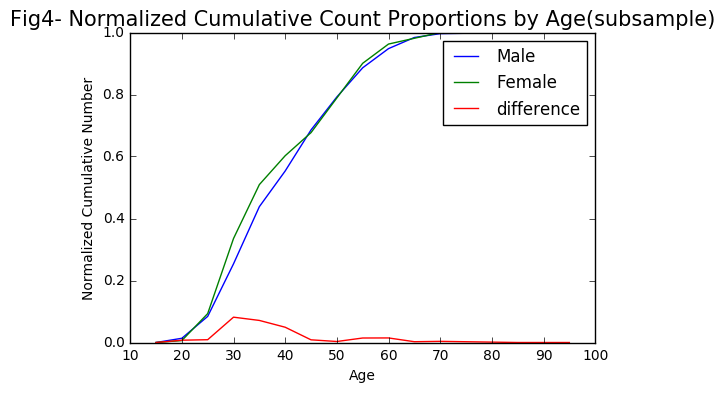

In [247]:
csM_sub=df2_sub.ageM.groupby(pd.cut(df2_sub.ageM, bins)).agg([count_nonzero]).cumsum()
csF_sub=df2_sub.ageF.groupby(pd.cut(df2_sub.ageF, bins)).agg([count_nonzero]).cumsum()
 
print (np.abs(csM_sub/csM_sub.max() - csF_sub/csF_sub.max()))  #|proportions of cumsum M - proportions of cumsom F|

pl.plot(bins[:-1] + 5, csM_sub/csM_sub.max(), label = 'Male')
pl.plot(bins[:-1] + 5, csF_sub/csF_sub.max(), label = 'Female')
pl.plot(bins[:-1] + 5, np.sqrt((csF_sub/csF_sub.max() - csM_sub/csM_sub.max())**2), 'r-',
        label = "difference")
pl.title('Fig4- Normalized Cumulative Count Proportions by Age(subsample)',fontsize=15)
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [248]:
# KS Test
ks_sub = scipy.stats.ks_2samp(df2_sub.ageM[~np.isnan(df2_sub.ageM)], df2_sub.ageF[~np.isnan(df2_sub.ageF)])
print (ks_sub)

Ks_2sampResult(statistic=0.1168300716320274, pvalue=0.047131100671457538)


In [249]:
# Check size
size_M_sub = df2_sub.ageM[~isnan(df2_sub.ageM)].shape[0]
size_F_sub = df2_sub.ageF[~isnan(df2_sub.ageF)].shape[0]
print 'Male sub-Sample Size: {};'.format(size_M), '\nFemale sub-Sample Size: {}'.format(size_F)

df2_sub.describe()

Male sub-Sample Size: 161561.0; 
Female sub-Sample Size: 33064.0


,birth year,gender,ageM,ageF
count,970.000000,985.000000,809.000000,161.000000
mean,1975.250515,1.148223,39.951792,38.732919
std,11.919585,0.396067,11.897516,12.015489
min,1910.000000,0.000000,17.000000,19.000000
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN
max,1998.000000,2.000000,105.000000,69.000000


### the sample KS p-value = 0.0471 **<** 0.05 = $\alpha$  
### So we reject the null hypothesis, concluding that there is a significant difference between the female and the male age sub group (they are not from the same distribution)

# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
#### a. sorted and 
#### b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### $\alpha$ = 0.05
## H0: There is no significant difference between the age distributions of Female and Male riders sample. 

In [250]:
# your code here!

size_M = df2.ageM.describe()[0]
size_F = df2.ageF.describe()[0]
print size_M,size_F

arr_M = np.array(df2.ageM[~isnan(df2.ageM)]) 
arr_F = np.array(df2.ageF[~isnan(df2.ageF)])
#check size
print len(arr_M), len(arr_F)

161561.0 33064.0
161561 33064


In [251]:
# size of Male is far more larger than size of female. 
# So we pick some male observations so it has the same size as Female sample.

row_ind_M = np.linspace(0, size_M-1, num=size_F).astype(int)
print row_ind_M
arr_M = arr_M[row_ind_M]
print len(arr_M)


[     0      4      9 ..., 161550 161555 161560]
33064


In [252]:
#sort
sort_M, sort_F = sort(arr_M), sort(arr_F)
print sort_M, sort_F

[  16.   16.   16. ...,  115.  115.  115.] [  17.   17.   17. ...,   89.   89.  115.]


In [253]:
# perform Peason Test
scipy.stats.pearsonr(sort_M, sort_F)

(0.99379127334484851, 0.0)

## Insight from Pearson's Test
### the sample  p-value ≈ 0 **<** 0.05 = $\alpha$  
### So we reject the null hypothesis, concluding that the difference between the female and the male rider's age group is statistically significant
#### This can also be seen from the correlation coeficient 0.9938--there is quite a strong positive correlation between these two sample groups.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

### $\alpha$ = 0.05
## H0: There is no significant difference between the age distributions of Female and Male riders sample. 

In [254]:
# The data wrangling stage I use the same method as the resizing and sorting of that for Pearson's test
# I am using the sort_M and sort_F I got from above, and perfrom the test

scipy.stats.spearmanr(sort_M, sort_F)

SpearmanrResult(correlation=0.99914285611284825, pvalue=0.0)

## Insight from Spearman's Test
### the sample  p-value ≈ 0 **<** 0.05 = $\alpha$  
### So we reject the null hypothesis, concluding that there is a significant difference between the female and the male rider's gender group(by age)
### This can also be seen from the correlation coeficient 0.9991--there is a pretty strong and positive correlation between these two sample groups.


## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!


In [255]:
#I am using the df2 I modified earlier for start.
df2.head()

,starttime,date,birth year,gender,ageM,ageF
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0
1,2/1/2015 0:00,2015-02-01 00:00:00,1993.0,1,22.0,NaN
2,2/1/2015 0:01,2015-02-01 00:01:00,1969.0,2,NaN,46.0
3,2/1/2015 0:01,2015-02-01 00:01:00,1985.0,2,NaN,30.0
4,2/1/2015 0:01,2015-02-01 00:01:00,1957.0,1,58.0,NaN


In [256]:
# define "day": riding from 07:00:00 to 18:59:59; " night": riding from 19:00:00 to 06:59:59
# Day: 1; Night: 0

D_N = lambda t: 1 if (int(t[-5:-3])>6 and int(t[-5:-3])<19) else 0
df2['Day_Night'] = df2.starttime.apply(D_N)

df2.head()

,starttime,date,birth year,gender,ageM,ageF,Day_Night
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0,0
1,2/1/2015 0:00,2015-02-01 00:00:00,1993.0,1,22.0,NaN,0
2,2/1/2015 0:01,2015-02-01 00:01:00,1969.0,2,NaN,46.0,0
3,2/1/2015 0:01,2015-02-01 00:01:00,1985.0,2,NaN,30.0,0
4,2/1/2015 0:01,2015-02-01 00:01:00,1957.0,1,58.0,NaN,0


In [257]:
# Create columns for age of day riders and age of night riders
df2['age_D'] = 2015 - df2['birth year'][(df2.Day_Night == 1)]
df2['age_N'] = 2015 - df2['birth year'][(df2.Day_Night == 0)]
df2.head()

,starttime,date,birth year,gender,ageM,ageF,Day_Night,age_D,age_N
0,2/1/2015 0:00,2015-02-01 00:00:00,1978.0,2,NaN,37.0,0,NaN,37.0
1,2/1/2015 0:00,2015-02-01 00:00:00,1993.0,1,22.0,NaN,0,NaN,22.0
2,2/1/2015 0:01,2015-02-01 00:01:00,1969.0,2,NaN,46.0,0,NaN,46.0
3,2/1/2015 0:01,2015-02-01 00:01:00,1985.0,2,NaN,30.0,0,NaN,30.0
4,2/1/2015 0:01,2015-02-01 00:01:00,1957.0,1,58.0,NaN,0,NaN,58.0


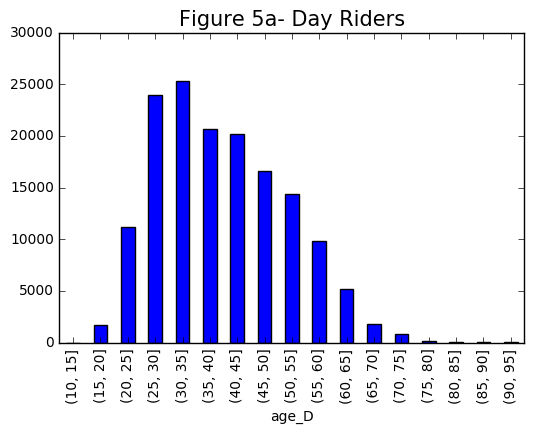

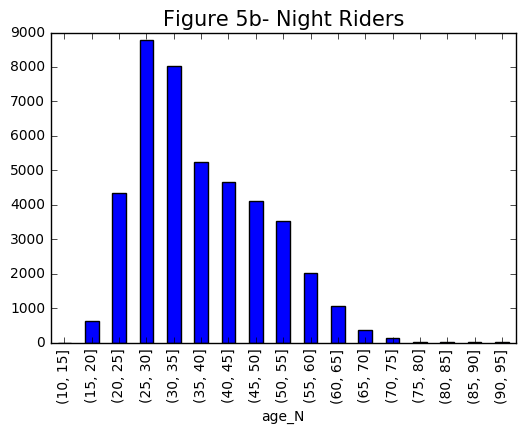

In [261]:
# plotting histograms for day riders and night riders
bins = np.arange(10, 99, 5)
axD = df2.age_D.groupby(pd.cut(df2.age_D, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("Figure 5a- Day Riders", fontsize=15)

axN = df2.age_N.groupby(pd.cut(df2.age_N, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("Figure 5b- Night Riders", fontsize=15)

          count_nonzero
age_D                  
(10, 15]       0.000000
(15, 20]       0.003410
(20, 25]       0.031309
(25, 30]       0.077655
(30, 35]       0.097990
(35, 40]       0.084038
(40, 45]       0.059443
(45, 50]       0.045239
(50, 55]       0.032973
(55, 60]       0.015375
(60, 65]       0.006215
(65, 70]       0.002425
(70, 75]       0.000414
(75, 80]       0.000036
(80, 85]       0.000022
(85, 90]       0.000019
(90, 95]       0.000000


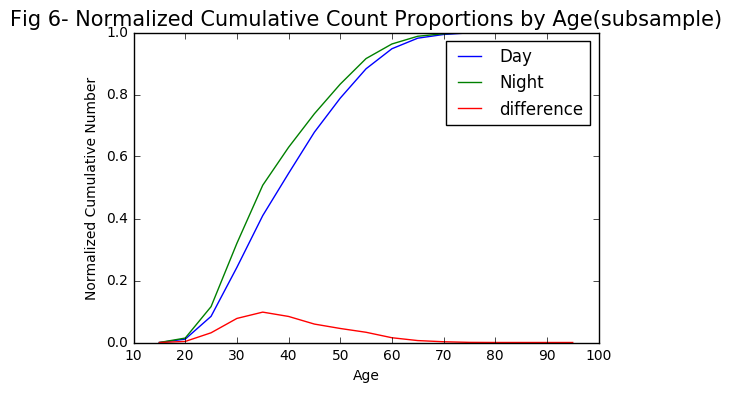

In [262]:
csD=df2.age_D.groupby(pd.cut(df2.age_D, bins)).agg([count_nonzero]).cumsum()
csN=df2.age_N.groupby(pd.cut(df2.age_N, bins)).agg([count_nonzero]).cumsum()
 
print (np.abs(csD/csD.max() - csN/csN.max()))  #|proportions of cumsum D - proportions of cumsom N|

pl.plot(bins[:-1] + 5, csD/csD.max(), label = 'Day')
pl.plot(bins[:-1] + 5, csN/csN.max(), label = 'Night')
pl.plot(bins[:-1] + 5, np.sqrt((csN/csN.max() - csD/csD.max())**2), 'r-',
        label = "difference")
pl.title('Fig 6- Normalized Cumulative Count Proportions by Age(subsample)',fontsize=15)
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## KS Test
### $\alpha$ = 0.05
## H0: There is no significant difference between the age distributions of Day rider and Night rider samples. 

In [263]:
ks_DN = scipy.stats.ks_2samp(df2.age_D[~isnan(df2.age_D)], df2.age_N[~isnan(df2.age_N)])
print ks_DN

Ks_2sampResult(statistic=0.12058895453169556, pvalue=0.0)


### the sample  p-value ≈ 0 **<** 0.05 = $\alpha$  
### So we reject the null hypothesis, concluding that the difference between the day and the night riders' age group is statistically significant
